<a href="https://colab.research.google.com/github/imaasthag/deep-learning/blob/main/Submission_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

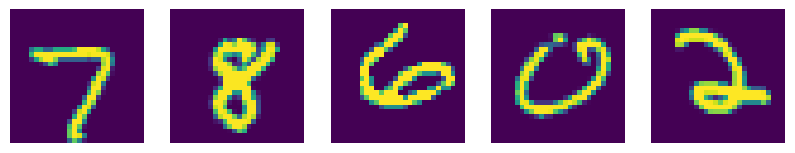

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

my_data = pd.read_csv("assets/mnist_train.csv")
sample_images = my_data.sample(n = 5)
fig, axes = plt.subplots(1, 5, figsize = (10, 2))

for i, (index, row) in enumerate(sample_images.iterrows()):
    label = row.iloc[0]
    pixel_values = row.iloc[1:].values.reshape(28,28)
    axes[i].imshow(pixel_values)
    axes[i].axis('off')

plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

x = my_data.iloc[:, 1:].values
y = my_data.iloc[:, 0].values

z = x/255

z_train, z_test, y_train, y_test = train_test_split(
    z, y, test_size = .2, random_state = 42
)

In [ ]:
#PART 2

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(max_iter = 1000)
model.fit(z_train, y_train)
z_pred = model.predict(z_test)


accuracy {91.91666666666667}
log loss {0.2969229705901235}


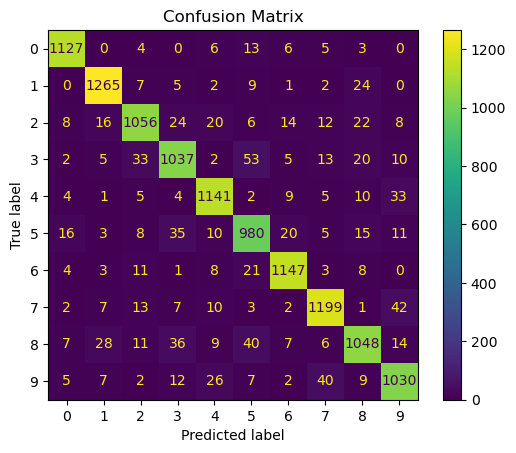

In [ ]:
from sklearn.metrics import accuracy_score, log_loss, ConfusionMatrixDisplay

accuracy = accuracy_score(y_test, z_pred)
print('accuracy', {accuracy * 100})

y_probability = model.predict_proba(z_test)
log_loss = log_loss(y_test, y_probability)
print('log loss', {log_loss})

ConfusionMatrixDisplay.from_predictions(y_test, z_pred)
plt.title('Confusion Matrix')
plt.show()

I think the classifier performs poorly when the value is highlighted in yellow, so where it 1265 and 1199 are highlighted, there is high level disparity between predicted and true label.

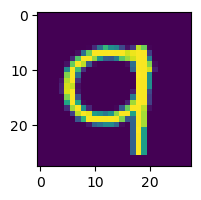

In [ ]:
misclassified = (y_test != z_pred)
z_wrong = z_test[misclassified]
y_wrong = y_test[misclassified]
z_pred_wrong = z_pred[misclassified]

N = 1
plt.figure(figsize=(10, 2))
for i in range(N):
    plt.subplot(1, N, i+1)
    plt.imshow(z_wrong[i].reshape(28, 28))
plt.show()

I think this shows 1 possible misclassified image, if you change N value, can see more.

In [ ]:
#PART 3

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(z_train, y_train)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(z_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
logreg_preds = model.predict(z_test)
knn_preds = knn_model.predict(z_test)
rf_preds = rf_model.predict(z_test)

logreg_acc = accuracy_score(y_test, logreg_preds)
knn_acc = accuracy_score(y_test, knn_preds)
rf_acc = accuracy_score(y_test, rf_preds)

print("Logistic Regression Accuracy:",  {logreg_acc * 100})
print("k-NN Accuracy:", {knn_acc * 100})
print("Random Forest Accuracy:", {rf_acc * 100})


Logistic Regression Accuracy: {91.91666666666667}
k-NN Accuracy: {96.86666666666667}
Random Forest Accuracy: {96.54166666666667}


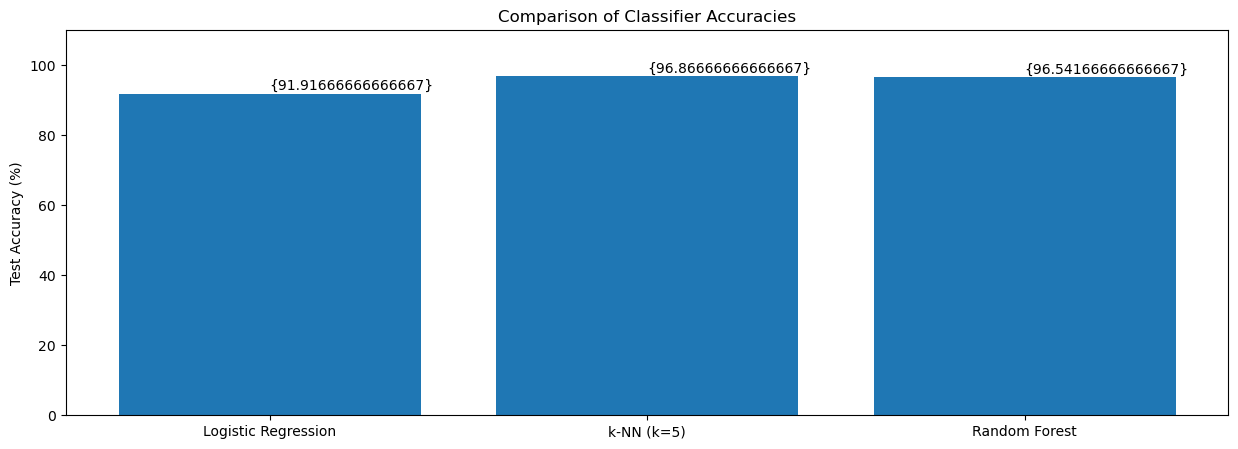

In [ ]:
models = ['Logistic Regression', 'k-NN (k=5)', 'Random Forest']
accuracies = [logreg_acc, knn_acc, rf_acc]

plt.figure(figsize=(15, 5))
plt.bar(models, [a * 100 for a in accuracies])
plt.ylabel('Test Accuracy (%)')
plt.title('Comparison of Classifier Accuracies')
plt.ylim(0, 110)
for i, acc in enumerate(accuracies):
    plt.text(i, acc * 100 + 1, {acc * 100})
plt.show()

Both K-NN and Random forest have similar test accuracy percentage, ~96%, so either one of them would work well! Logisitc regression also is above 90% test accuracy so for another data set, this could also work well

In [ ]:
#PART 4

In [ ]:
probas = model.predict_proba(z_test)
misclassified = np.where(y_test != logreg_preds)[0]
for i in range(5):
    mis = misclassified[i]
    true_label = y_test[mis]
    pred_label = logreg_preds[mis]
    probs = probas[mis]

    print({i+1})
    print('True Label:', {true_label})
    print('Predicted Label:', {pred_label})
    formatted_probs = [{p} for p in probs]
    print('Softmax Probabilities:')
    print(formatted_probs)



{1}
True Label: {np.int64(9)}
Predicted Label: {np.int64(7)}
Softmax Probabilities:
[{np.float64(0.004513048532756119)}, {np.float64(1.0697064374278245e-12)}, {np.float64(0.031845655063147474)}, {np.float64(0.046381437035930895)}, {np.float64(6.799401391557904e-05)}, {np.float64(0.008851571266154682)}, {np.float64(2.082196618523177e-05)}, {np.float64(0.6724663357459296)}, {np.float64(0.003549850540689378)}, {np.float64(0.2323032858342213)}]
{2}
True Label: {np.int64(8)}
Predicted Label: {np.int64(1)}
Softmax Probabilities:
[{np.float64(0.00028835045327983927)}, {np.float64(0.53871715983407)}, {np.float64(0.012684935506928816)}, {np.float64(0.043507937644129344)}, {np.float64(6.195890365169969e-06)}, {np.float64(0.07348714488799804)}, {np.float64(0.002065391525600025)}, {np.float64(0.00013832526464022782)}, {np.float64(0.3261441595731651)}, {np.float64(0.0029603994198233964)}]
{3}
True Label: {np.int64(2)}
Predicted Label: {np.int64(0)}
Softmax Probabilities:
[{np.float64(0.686695698178

Just looking at the integers that were mixed up, for example, the first one, 7 was mixed up with 9, both those numbers, depending on how they are written can be confusing to discern because they are both very vertical.

In [ ]:
class_1_indices = np.where(y_train == 1)[0]
other_indices = np.where(y_train != 1)[0]

downsampled_class_1_indices = np.random.choice(class_1_indices,
                                              size=int(0.3 * len(class_1_indices)),
                                              replace=False)

new_train_indices = np.concatenate([downsampled_class_1_indices, other_indices])
#note for self- concatenate means to link arrays

np.random.seed(42)
np.random.shuffle(new_train_indices)

z_train_imbalanced = z_train[new_train_indices]
y_train_imbalanced = y_train[new_train_indices]

In [ ]:
logreg_imbalanced = LogisticRegression(max_iter=1000)
logreg_imbalanced.fit(z_train_imbalanced, y_train_imbalanced)

LogisticRegression(max_iter=1000)

In [ ]:
from sklearn.metrics import accuracy_score, log_loss
y_pred_imbalanced = logreg_imbalanced.predict(z_test)
y_proba_imbalanced = logreg_imbalanced.predict_proba(z_test)

acc_imbalanced = accuracy_score(y_test, y_pred_imbalanced)
logloss_imbalanced = log_loss(y_test, y_proba_imbalanced)

print('Accuracy after class imbalance:', {acc_imbalanced * 100})
print('Log Loss after class imbalance:', {logloss_imbalanced})

Accuracy after class imbalance: {91.84166666666667}
Log Loss after class imbalance: {0.3042642963332054}


If I am not mistaken, the accuracy is much less than k-NN or Random forest and slightly less than logistic regression. Performing class imbalance on this modified dataset decreased accuracy which means reducing sample size drastically, to 30%, makes accuracy drop but not incredibly so.